# *ТМО ЛР4 ИУ5-64 Шимко Даниил*

# Линейные модели, SVM и деревья решений.
- Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- Обучите следующие модели:
	- одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
	- SVM;
	- дерево решений.
- Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
- Постройте график, показывающий важность признаков в дереве решений.
- Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.делей.

# Набор данных: Boston housing dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from io import StringIO 
from PIL import Image
from IPython.display import display
import graphviz 
import pydotplus
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
import seaborn as sns
import time
import matplotlib.pyplot as plt
from kaggle.api.kaggle_api_extended import KaggleApi
pd.options.display.max_columns = None

In [2]:
kaggle_api = KaggleApi()
kaggle_api.authenticate()
kaggle_api.dataset_download_files('altavish/boston-housing-dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset


## Смотрю, что в данных

In [3]:
df = pd.read_csv('HousingData.csv')
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Проверяю типы данных

In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Проверяю значения категориальных признаков

In [5]:
df.CHAS.unique()

array([ 0., nan,  1.])

## Проверяю пропуски

In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## Заполняю пропуски в численном признаке "CRIM" в соответствии с описанием "CRIM - per capita crime rate by town"

In [7]:
df[df.CRIM == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


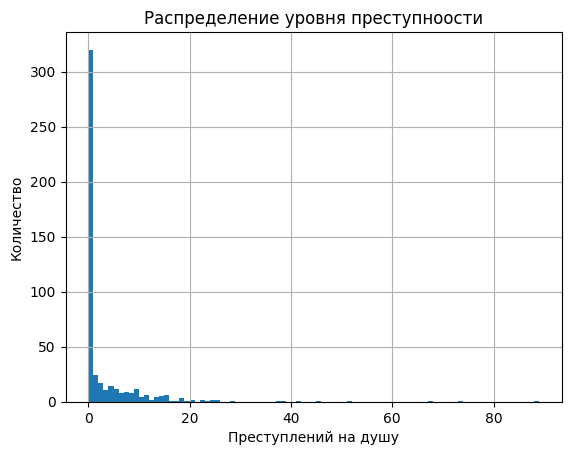

In [8]:
df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

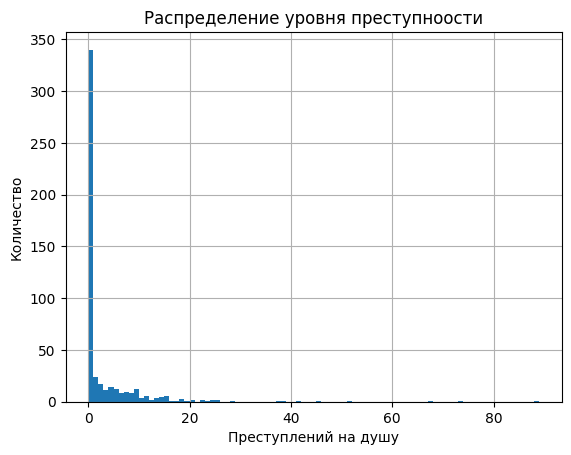

In [9]:
df = df.fillna(value={"CRIM": 0})

df.CRIM.hist(bins=range(90))
plt.title('Распределение уровня преступноости')
plt.xlabel('Преступлений на душу')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "ZN" в соответствии с описанием "ZN - proportion of residential land zoned for lots over 25,000 sq.ft."

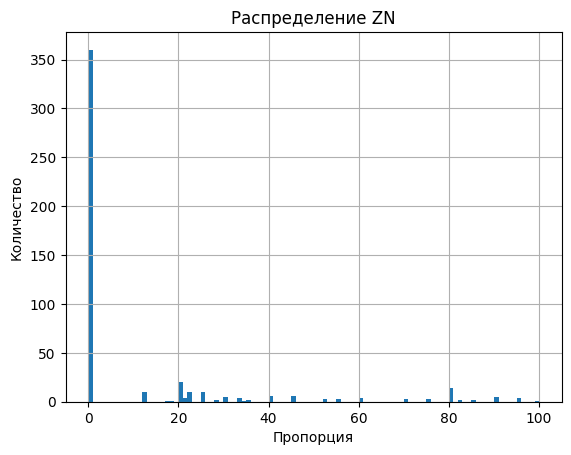

In [10]:
df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

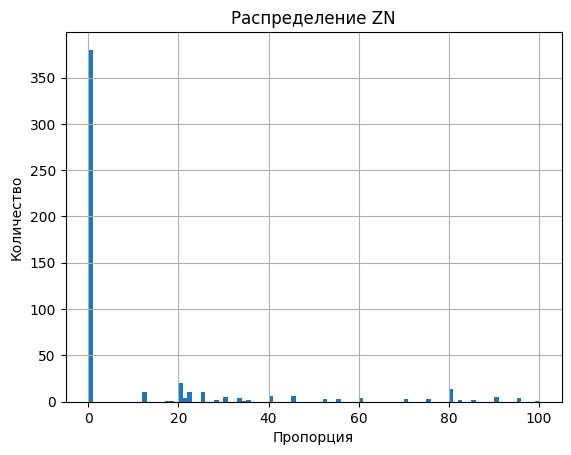

In [11]:
df = df.fillna(value={"ZN": 0})

df.ZN.hist(bins=range(101))
plt.title('Распределение ZN')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "INDUS" в соответствии с описанием "INDUS - proportion of non-retail business acres per town."

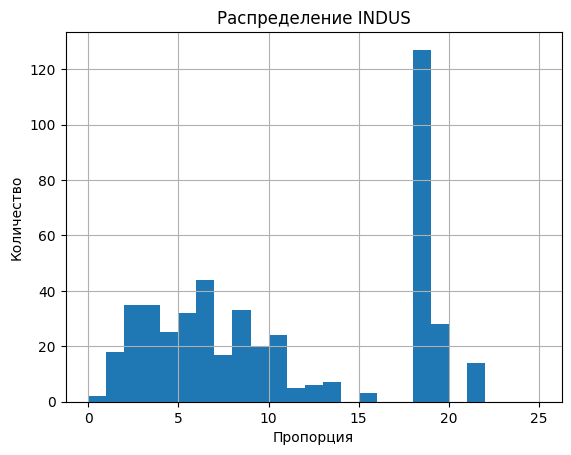

In [12]:
df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

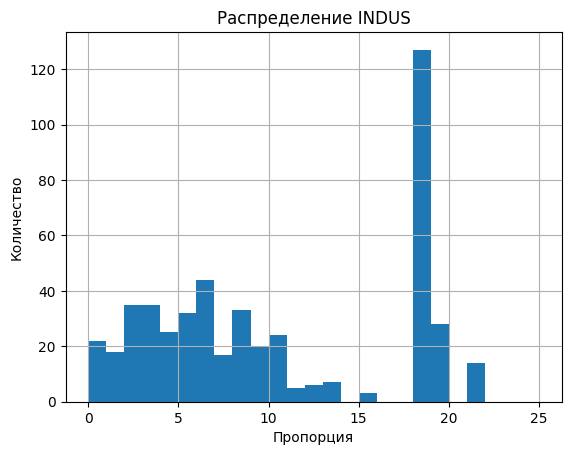

In [13]:
df = df.fillna(value={"INDUS": 0})

df.INDUS.hist(bins=range(26))
plt.title('Распределение INDUS')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Не удаляю пропуски в категориальном признаке "CHAS" в соответствии с описанием "CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)"

In [14]:
df = df.fillna(value={"CHAS": 2})

## Заполняю пропуски в численном признаке "AGE" в соответствии с описанием "AGE - proportion of owner-occupied units built prior to 1940"

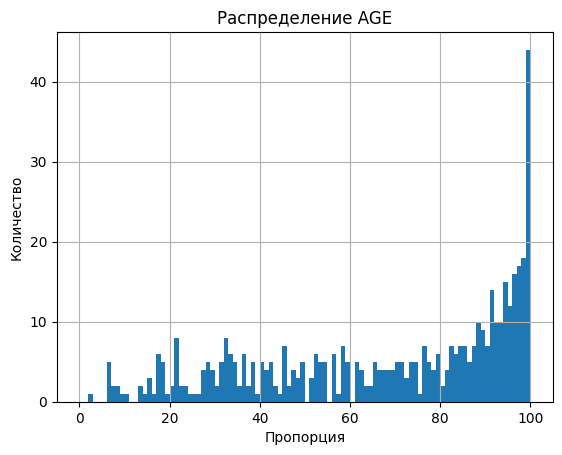

In [15]:
df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

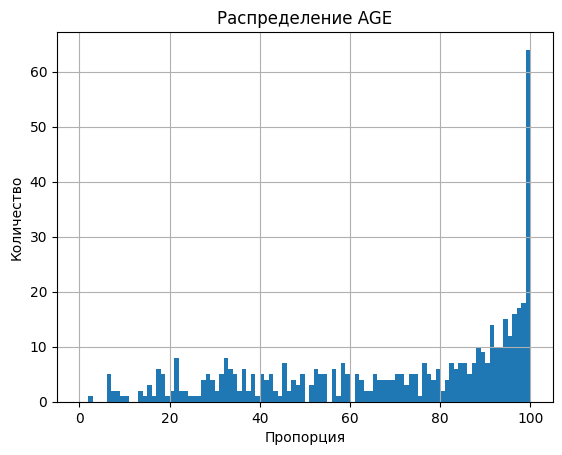

In [16]:
df = df.fillna(value={"AGE": 100})

df.AGE.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

## Заполняю пропуски в численном признаке "LSTAT" в соответствии с описанием "LSTAT - % lower status of the population"

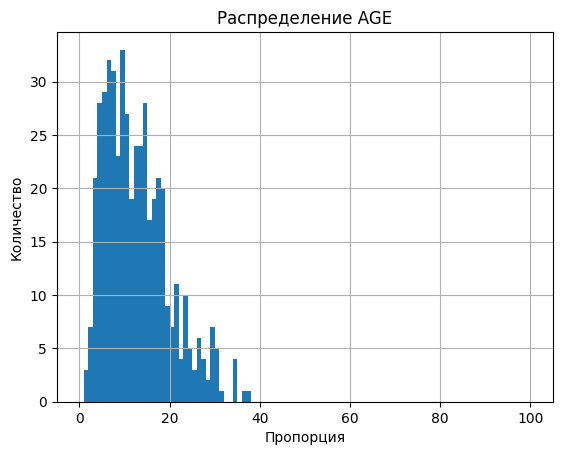

In [17]:
df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

11.43


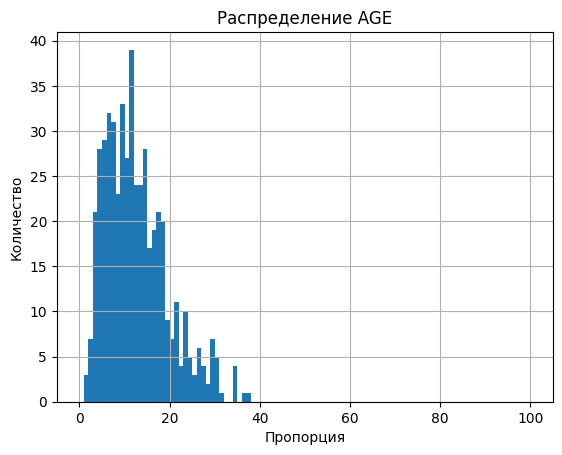

In [18]:
med = df.LSTAT.median()
print(med)
df = df.fillna(value={"LSTAT": int(med)})

df.LSTAT.hist(bins=range(101))
plt.title('Распределение AGE')
plt.xlabel('Пропорция')
plt.ylabel('Количество')
plt.show()

In [19]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Преобразую категориальные признаки (one hot encoding)

In [20]:
for to_enc in ["CHAS"]:
    one_hot = pd.get_dummies(df[to_enc]).astype(int)
    del df[to_enc]
    df = df.join(one_hot)
df.columns = df.columns.map(str)
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0.0,1.0,2.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1,0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1,0,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,0,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,0,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.00,36.2,1,0,0


## Провожу разделение на тестовую и обучающую выборки, обучаю и тестирую KNN для предсказания признака MEDV (регрессия), оцениваю с помощью MAE, MSE

In [21]:
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   return("{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [22]:
y = df.MEDV.copy()
X = df.loc[:, df.columns != "MEDV"].copy()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## LinearRegression

In [24]:
model = LinearRegression()

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MSE = %.4f" % testMSE)
print("Train MSE = %.4f" % trainMSE)

Test MAE = 3.1749
Train MAE = 3.4341
Test MSE = 21.0359
Train MSE = 23.9223


In [25]:
LinearRegressionMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["LinearRegression"])
LinearRegressionMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
LinearRegression,3.434127,3.174935,23.92229,21.03586,00:00:00,00:00:00,00:00:00


## SVR

In [26]:
model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MSE = %.4f" % testMSE)
print("Train MSE = %.4f" % trainMSE)

Test MAE = 3.1370
Train MAE = 3.3079
Test MSE = 28.4224
Train MSE = 32.4563


In [27]:
SVRMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["SVR"])
SVRMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
SVR,3.307937,3.136983,32.456253,28.422447,00:00:00,00:00:00,00:00:00


## DecisionTreeRegressor

In [28]:
model = DecisionTreeRegressor(random_state=42)

start = time.time()
model.fit(X_train, y_train)
end = time.time()
fitTime = exec_time(start, end)

start = time.time()
y_pred = model.predict(X_test)
end = time.time()
testTime = exec_time(start, end)

start = time.time()
y_train_pred = model.predict(X_train)
end = time.time()
trainTime = exec_time(start, end)

testMAE = mean_absolute_error(y_test, y_pred)
trainMAE = mean_absolute_error(y_train, y_train_pred)
testMSE = mean_squared_error(y_test, y_pred)
trainMSE = mean_squared_error(y_train, y_train_pred)
print("Test MAE = %.4f" % testMAE)
print("Train MAE = %.4f" % trainMAE)
print("Test MSE = %.4f" % testMSE)
print("Train MSE = %.4f" % trainMSE)

Test MAE = 3.1186
Train MAE = 0.0000
Test MSE = 22.5381
Train MSE = 0.0000


In [29]:
DecisionTreeRegressorMAE = pd.DataFrame({
    "Train MAE" : [trainMAE],
    "Test MAE" : [testMAE],
    "Train MSE" : [trainMSE],
    "Test MSE" : [testMSE],
    "Fit time" : [fitTime],
    "Test time on train df" : [trainTime],
    "Test time on test df" : [testTime],
}, index=["DecisionTreeRegressor"])
DecisionTreeRegressorMAE

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
DecisionTreeRegressor,0.0,3.118563,0.0,22.538084,00:00:00,00:00:00,00:00:00


## Провожу сравнение

In [30]:
AllMAE = pd.concat([LinearRegressionMAE, SVRMAE, DecisionTreeRegressorMAE])
AllMAE.sort_values(by=["Test MSE"])

,Train MAE,Test MAE,Train MSE,Test MSE,Fit time,Test time on train df,Test time on test df
LinearRegression,3.434127,3.174935,23.922290,21.035860,00:00:00,00:00:00,00:00:00
DecisionTreeRegressor,0.000000,3.118563,0.000000,22.538084,00:00:00,00:00:00,00:00:00
SVR,3.307937,3.136983,32.456253,28.422447,00:00:00,00:00:00,00:00:00


## Постройте график, показывающий важность признаков в дереве решений.

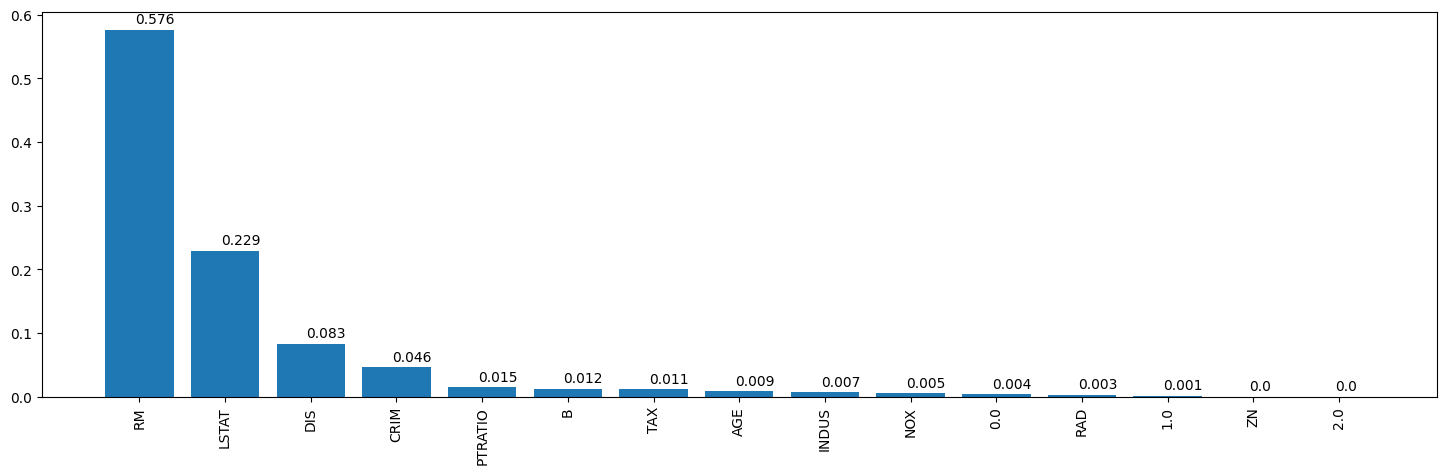

(['RM',
  'LSTAT',
  'DIS',
  'CRIM',
  'PTRATIO',
  'B',
  'TAX',
  'AGE',
  'INDUS',
  'NOX',
  '0.0',
  'RAD',
  '1.0',
  'ZN',
  '2.0'],
 [0.5761243639453768,
  0.22901182517787338,
  0.08301815125771318,
  0.045785536528624826,
  0.014687288464733385,
  0.011836816631687352,
  0.011471307015041284,
  0.008507240084225357,
  0.007041387346863622,
  0.005049738327533207,
  0.0035380969787297163,
  0.0029642989935224975,
  0.0009365627833557665,
  2.7386464719537146e-05,
  0.0])

In [31]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

draw_feature_importances(model, X)

## Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [32]:
# Слишком большое разрешение для гитхаба
# import os
# import subprocess
# import sys
# os.environ['dot'] = r"C:\Program Files\Graphviz\bin\dot.exe"
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
# 
# dot_data = export_graphviz(model, out_file=None, 
#                            feature_names=X.columns, 
#                            class_names=None, 
#                            filled=True, rounded=True, special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph.render("my_decision_tree", format="jpg", view=False)
# img = Image.open('my_decision_tree.jpg')
# display(img)

### Отрисую дерево пониже

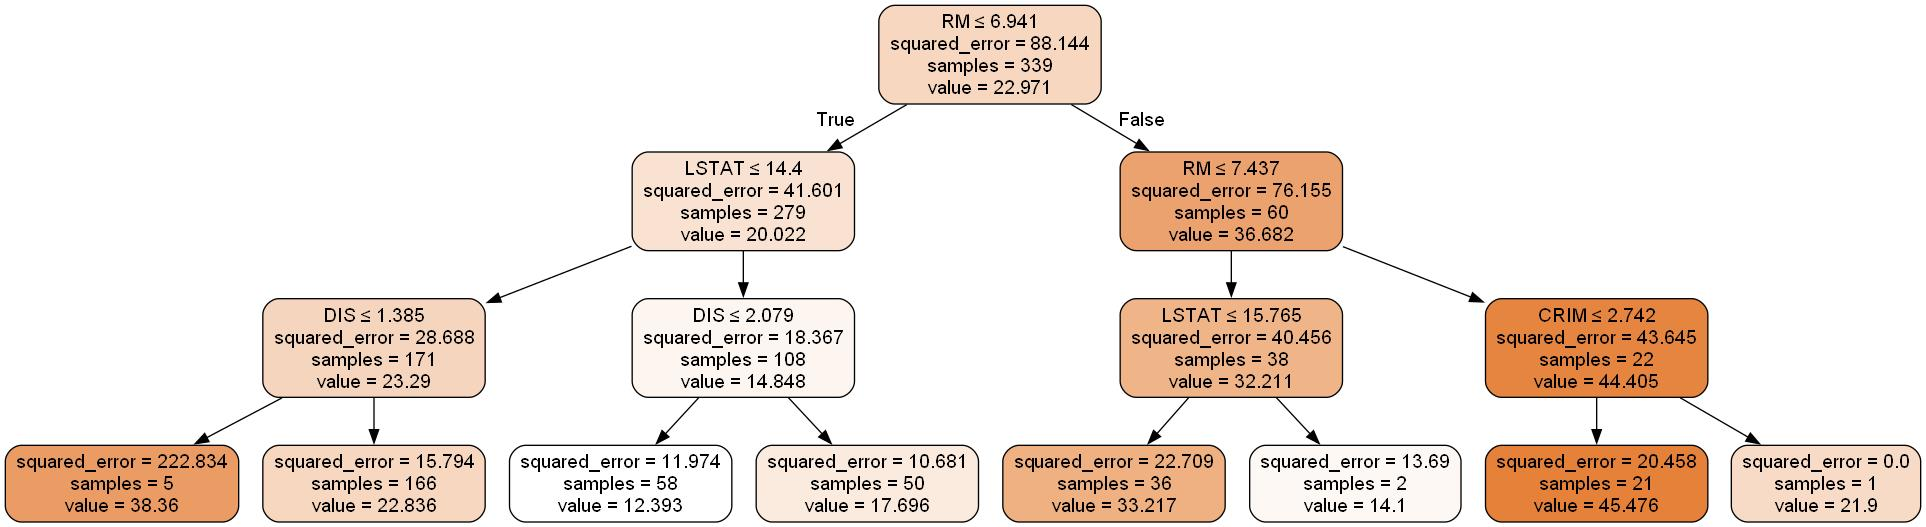

In [33]:
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns, 
                           class_names=None, 
                           filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("my_decision_tree", format="jpg", view=False)
img = Image.open('my_decision_tree.jpg')
display(img)